In [1]:
#Import the libraries
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
from matplotlib import cm
import scipy.cluster.hierarchy as sch
#ncol = len(phy_norm.T.columns)
ncol = 12
values = np.linspace(0,1, ncol)
colors_ = cm.Paired(values)
sns.set_style("darkgrid")

#   Read Data 

In [2]:
phylum=pd.read_table("../data/PhylumN0.txt", index_col=0)
phylum.index.name=None
phylum = phylum.sort_values('S1', ascending=False)

clase=pd.read_table("../data/classN0.txt", index_col=0)
clase.index.name=None
clase = clase.sort_values('S1', ascending=False) 

order = pd.read_table ("../data/orderN0.txt", index_col=0)
order.index.name =None 
order = order.sort_values('S1', ascending=False) 

family=pd.read_table("../data/familyN0.txt", index_col=0)
family.index.name=None
family = family.sort_values('S1', ascending=False) 

genus=pd.read_table("../data/genusN0.txt", index_col=0)
genus.index.name=None
genus = genus.sort_values('S1', ascending=False) 
genus.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Bacteria unclassified,1438,479,1550,1925,1651,1652,1938,2156,2058,2401,2537,2551
Rhodobacteraceae unclassified,1315,713,2648,2241,1537,600,1044,1033,998,782,417,808
Proteobacteria unclassified,1089,343,1418,1661,1320,1276,1591,1547,1519,1471,1283,2289
Alphaproteobacteria unclassified,938,360,1263,1479,919,737,1009,831,951,883,546,996
Actinobacteria unclassified_class_1760,648,148,612,927,669,772,1026,906,949,891,881,1140


##   Normalized data 

In [3]:
genus_norm=genus/genus.sum()
family_norm=family/family.sum()
clase_norm=clase/clase.sum()
order_norm=order/order.sum()
phylum_norm=phylum/phylum.sum()
phylum_norm.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Proteobacteria,0.747237,0.702868,0.808853,0.744788,0.780539,0.700727,0.658075,0.733638,0.639115,0.678309,0.644841,0.696960
Bacteria unclassified,0.059517,0.034961,0.035847,0.047157,0.047111,0.079588,0.055873,0.056329,0.069914,0.089979,0.107101,0.078031
Actinobacteria,0.057407,0.023794,0.030435,0.058205,0.043087,0.077468,0.072738,0.054683,0.073210,0.077537,0.078816,0.078704
Cyanobacteria,0.024544,0.012627,0.041097,0.033365,0.023598,0.004529,0.025947,0.014370,0.060912,0.021099,0.002997,0.004649
Bacteroidetes,0.023964,0.075031,0.034298,0.016903,0.041204,0.013538,0.022228,0.022338,0.016069,0.012817,0.015324,0.011257


In [4]:
familyRB=family_norm[family_norm <0.01]
familyRB=familyRB.dropna()
#familyRB.to_csv("family_RareBiosphere.csv",sep="\t")


## Total numbers 

In [5]:
phylum_norm.T.sum()*10
phylum_norm.T.std().head()

Proteobacteria           0.053223
Bacteria unclassified    0.022061
Actinobacteria           0.019446
Cyanobacteria            0.016907
Bacteroidetes            0.018024
dtype: float64

In [6]:
#clase_norm.T.sum()*10
clase_norm.T.std().head()

Alphaproteobacteria      0.095112
Deltaproteobacteria      0.075977
Gammaproteobacteria      0.041764
Bacteria unclassified    0.022061
Betaproteobacteria       0.016537
dtype: float64

## Sort and group by site (A, B, C) 

In [7]:
genus_norm_a=genus_norm[['S1', 'S4', 'S7', 'S10']]
genus_norm_b=genus_norm[['S2', 'S5', 'S8', 'S11']]
genus_norm_c=genus_norm[['S3', 'S6', 'S9', 'S12']]

family_norm_a=family_norm[['S1', 'S4', 'S7', 'S10']]
family_norm_b=family_norm[['S2', 'S5', 'S8', 'S11']]
family_norm_c=family_norm[['S3', 'S6', 'S9', 'S12']]

clase_norm_a=clase_norm[['S1', 'S4', 'S7', 'S10']]
clase_norm_b=clase_norm[['S2', 'S5', 'S8', 'S11']]
clase_norm_c=clase_norm[['S3', 'S6', 'S9', 'S12']]

order_norm_a=order_norm[['S1', 'S4', 'S7', 'S10']]
order_norm_b=order_norm[['S2', 'S5', 'S8', 'S11']]
order_norm_c=order_norm[['S3', 'S6', 'S9', 'S12']]

phylum_norm_a=phylum_norm[['S1', 'S4', 'S7', 'S10']]
phylum_norm_b=phylum_norm[['S2', 'S5', 'S8', 'S11']]
phylum_norm_c=phylum_norm[['S3', 'S6', 'S9', 'S12']]


In [8]:
genus_norm_a.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
genus_norm_b.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
genus_norm_c.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']

family_norm_a.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
family_norm_b.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
family_norm_c.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']

clase_norm_a.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
clase_norm_b.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
clase_norm_c.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']

order_norm_a.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
order_norm_b.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
order_norm_c.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']

phylum_norm_a.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
phylum_norm_b.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
phylum_norm_c.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']



# Barplots figures

## Family level 

### Site A

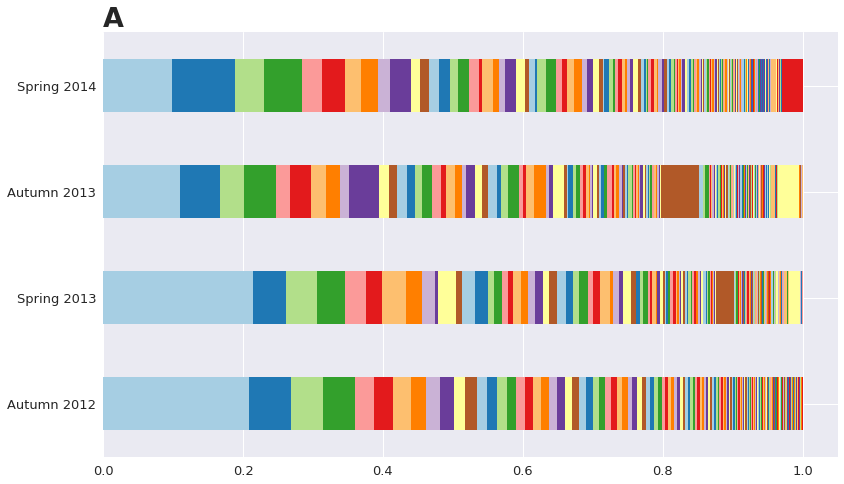

In [9]:
sns.set(font_scale=1.3)
ax1=family_norm_a.T.plot(kind='barh',stacked=True,color=colors_, figsize=(12,7))
lines, labels = ax1.get_legend_handles_labels()
ax1.legend_.remove()

plt.title("A", weight='bold', size='xx-large', loc='left')
plt.tight_layout()
#plt.savefig("../figures/SiteA_family.png", bbox_inches='tight', dpi=400)

### Site B

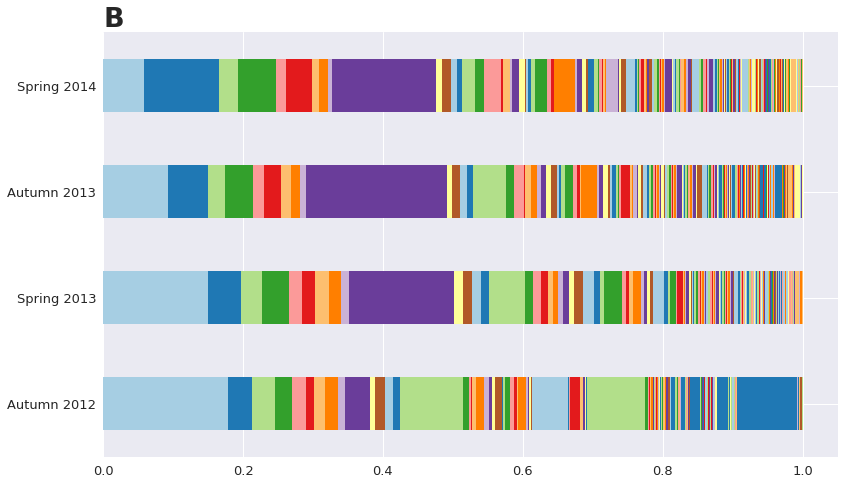

In [12]:
sns.set(font_scale=1.3)
ax1=family_norm_b.T.plot(kind='barh',stacked=True,color=colors_, figsize=(12,7))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
lines, labels = ax1.get_legend_handles_labels()
ax1.legend_.remove()
plt.title("B", weight='bold', size='xx-large', loc='left')
plt.tight_layout()
#plt.savefig("../figures/SiteB_family.png", bbox_inches='tight', dpi=400)

### Site C

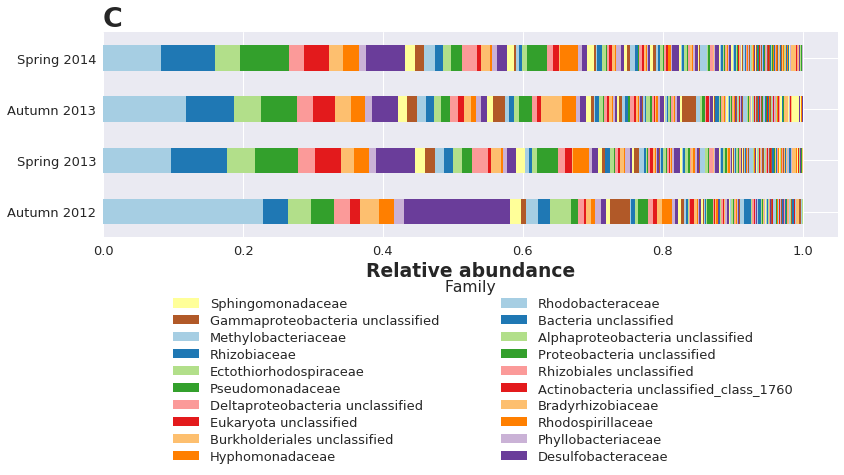

In [13]:
sns.set(font_scale=1.3)
ax1=family_norm_c.T.plot(kind='barh',stacked=True,color=colors_, figsize=(12,7))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
lines, labels = ax1.get_legend_handles_labels()
#ax1.legend(lines[:20], labels[:30], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.3)
ax1.legend(lines[:20], labels[:30], bbox_to_anchor=(0.5, -0.05), loc='upper center', borderaxespad=2 ,labelspacing=0.3,
          ncol=2, mode="expand", title='Family')
plt.title("C", weight='bold', size='xx-large', loc='left')
plt.xlabel("Relative abundance", weight='bold', size="large" )
plt.tight_layout()
#plt.savefig("../figures/SiteC_family.png", bbox_inches='tight', dpi=400)

# Fold Change log10

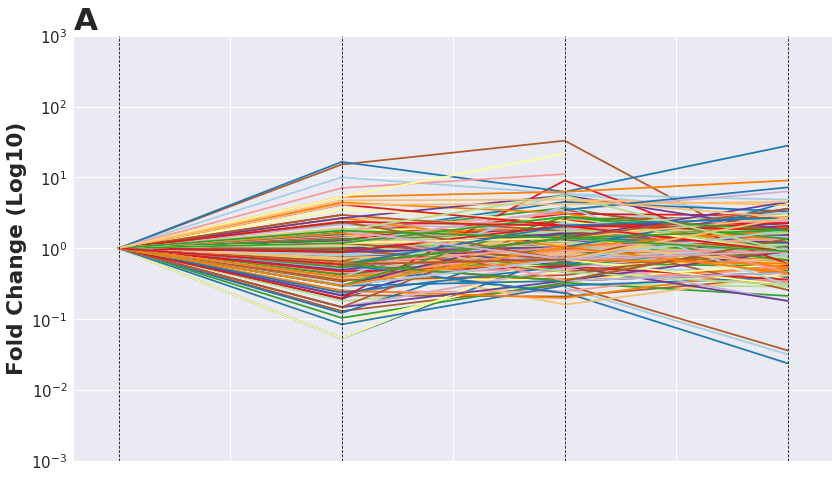

In [10]:
sns.set(font_scale=1.5)
fam_norm_a_n =family_norm_a.T/family_norm_a.T.iloc[0]
fam_norm_a_n
ax=fam_norm_a_n.plot(legend=False,color=colors_, figsize=(12,7))
plt.yscale('log')
plt.ylim((10**-3, 10**3))
plt.ylabel('Fold Change (Log10)', size='large', weight='bold')
plt.title("A", weight='bold', size='xx-large', loc='left')
#Hide the axis and indicate sampling time in figure C 
ax.set_xlim(-.2,3.2)
plt.axvline(0, linestyle='--', color='black', linewidth=0.8)
plt.axvline(1, linestyle='--', color='black',linewidth=0.8)
plt.axvline(2, linestyle='--', color='black',linewidth=0.8)
plt.axvline(3, linestyle='--', color='black',linewidth=0.8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()
#plt.savefig("siteA_family.log.png", bbox_inches='tight', dpi=400)

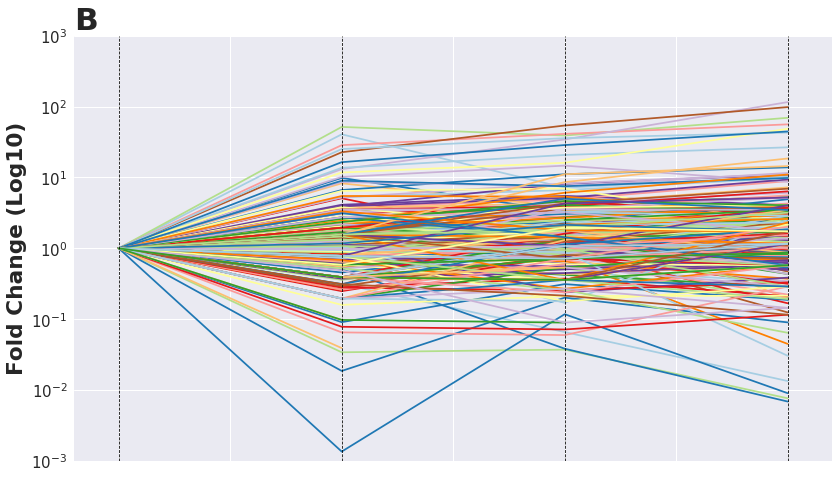

In [11]:
sns.set(font_scale=1.5)
fam_norm_b_n =family_norm_b.T/family_norm_b.T.iloc[0]
ax=fam_norm_b_n.plot(legend=False,color=colors_, figsize=(12,7))
plt.yscale('log')
plt.ylim((10**-3, 10**3))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('Fold Change (Log10)', size='large', weight='bold')
plt.title("B", weight='bold', size='xx-large', loc='left')
ax.set_xlim(-.2,3.2)
plt.axvline(0, linestyle='--', color='black', linewidth=0.8)
plt.axvline(1, linestyle='--', color='black',linewidth=0.8)
plt.axvline(2, linestyle='--', color='black',linewidth=0.8)
plt.axvline(3, linestyle='--', color='black',linewidth=0.8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()

#plt.savefig("siteB_family.log.png", bbox_inches='tight', dpi=400)

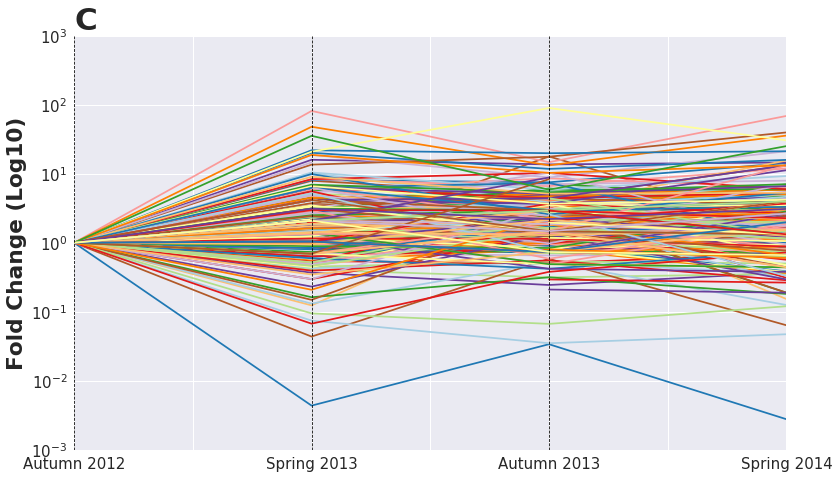

In [12]:
sns.set(font_scale=1.5)
fam_norm_c_n =family_norm_c.T/family_norm_c.T.iloc[0]
fam_norm_c_n.plot(legend=False,color=colors_, figsize=(12,7))
plt.yscale('log')
plt.ylim((10**-3, 10**3))
plt.ylabel('Fold Change (Log10)', size='large', weight='bold')
plt.title("C", weight='bold', size='xx-large', loc='left')
ax.set_xlim(-.2,3.2)
plt.axvline(0, linestyle='--', color='black', linewidth=0.8)
plt.axvline(1, linestyle='--', color='black',linewidth=0.8)
plt.axvline(2, linestyle='--', color='black',linewidth=0.8)
plt.axvline(3, linestyle='--', color='black',linewidth=0.8)
#ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()

#plt.savefig("siteC_family.log.png", bbox_inches='tight', dpi=400)

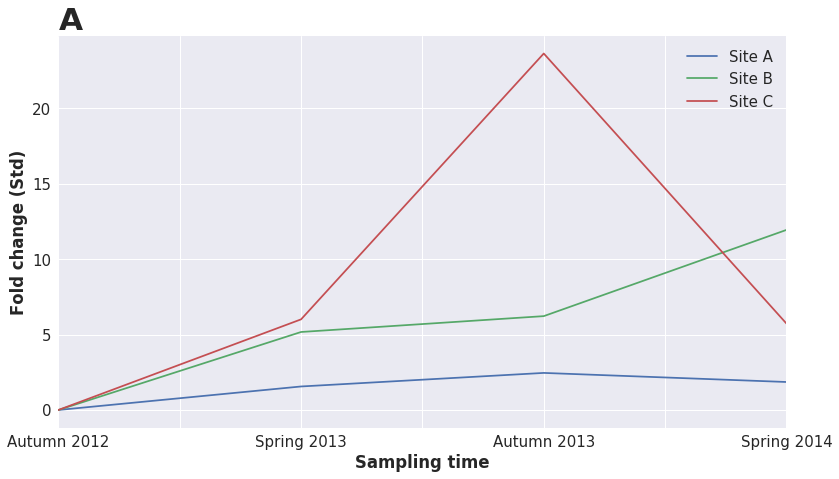

In [13]:
sns.set(font_scale=1.5)

sns.set_style("darkgrid")

sitios = [fam_norm_a_n, fam_norm_b_n, fam_norm_c_n]
names = ['Site A', 'Site B', 'Site C']

for i in range(3):
    df_ = sitios[i]
    nam_ = names[i]
    mask = np.isnan(df_) | np.isinf(df_)
    std_ = df_[~mask].T.std()
    std_.plot(label=nam_, figsize=(12,7))

plt.legend()
#plt.xticks(rotation=45)
plt.ylabel('Fold change (Std)', weight='bold')
plt.xlabel("Sampling time", weight='bold')
#plt.title("Fold change standard deviation (std)", size='large', weight='bold')
plt.title("A", loc='left', size="xx-large", weight='bold')
plt.tight_layout()
plt.savefig("../figures/Foldchangestd.png", dpi=600) 

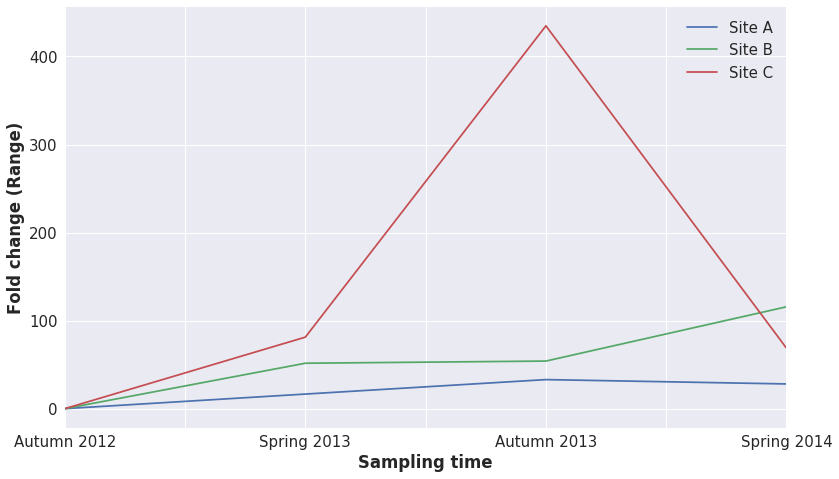

In [35]:
sitios = [fam_norm_a_n, fam_norm_b_n, fam_norm_c_n]
names = ['Site A', 'Site B', 'Site C']

for i in range(3):
    df_ = sitios[i]
    nam_ = names[i]
    mask = np.isnan(df_) | np.isinf(df_)
    range_ = df_[~mask].T.max() - df_[~mask].T.min()
    range_.plot(label=nam_,figsize=(12,7))

plt.legend()
plt.ylabel('Fold change (Range)', weight='bold')
plt.xlabel("Sampling time", weight='bold')
#plt.title("Fold change range", size='large', weight='bold')
#plt.title("A", loc='left', size="xx-large", weight='bold')
plt.tight_layout()
#plt.savefig("../figures/FoldchangeRange.png", dpi=600) 

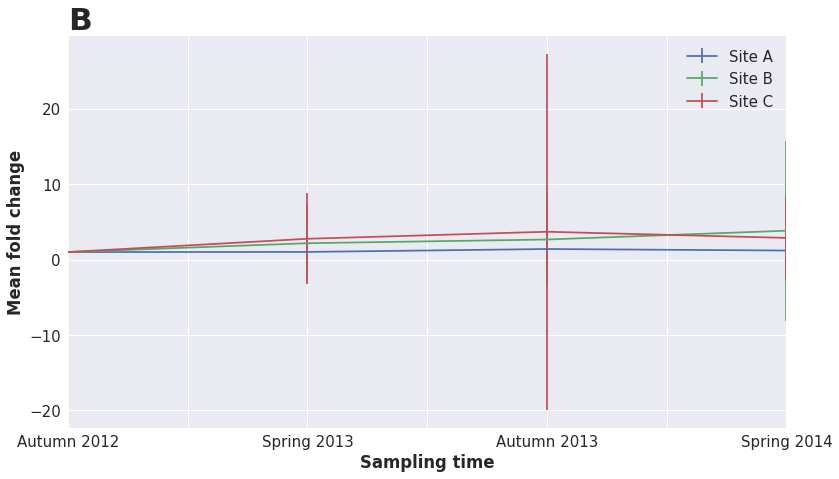

In [14]:
sns.set(font_scale=1.5)
sitios = [fam_norm_a_n, fam_norm_b_n, fam_norm_c_n]
names = ['Site A', 'Site B', 'Site C']

for i in range(3):
    df_ = sitios[i]
    nam_ = names[i]
    mask = np.isnan(df_) | np.isinf(df_)
    mean_ = df_[~mask].T.mean()
    std_ = df_[~mask].T.std()
    mean_.plot(label=nam_, yerr=std_,figsize=(12,7) )

plt.legend()
plt.ylabel('Mean fold change', weight='bold')
plt.xlabel("Sampling time", weight='bold')
#plt.title("Fold change range", size='large', weight='bold')
plt.title("B", loc='left', size="xx-large", weight='bold')
plt.tight_layout()
plt.savefig("../figures/FoldchangeMean.png", dpi=600) 

In [38]:
#DTAFRAME melting

In [19]:
ma = fam_norm_a_n.T.melt()
ma['site'] = ['A'] * len(ma)

mb = fam_norm_b_n.T.melt()
mb['site'] = ['B'] * len(mb)

mc = fam_norm_c_n.T.melt()
mc['site'] = ['C'] * len(mc)

mconcat = pd.concat([ma, mb, mc])
mmask = np.isnan(mconcat['value']) | np.isinf(mconcat['value'])

In [21]:
mconcat.head()


,variable,value,site
0,Autumn 2012,1.0,A
1,Autumn 2012,1.0,A
2,Autumn 2012,1.0,A
3,Autumn 2012,1.0,A
4,Autumn 2012,1.0,A


### Boxplot of normalized abundance change --- Total y scale

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

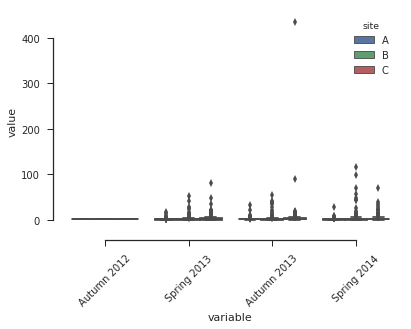

In [64]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set(style="ticks")
sns.boxplot(x="variable", y="value", hue="site", data=mconcat[~mmask])
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
#not observable differences

### Boxplot of normalized abundance change --- Resized y scale

Text(0,0.5,'Fold change')

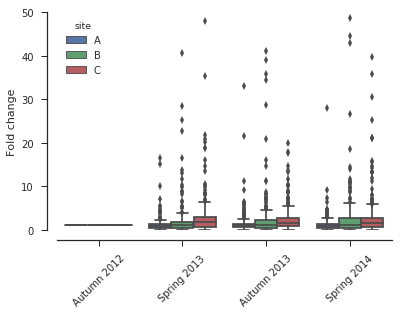

In [65]:
sns.set(style="ticks")
sns.boxplot(x="variable", y="value", hue="site", data=mconcat[~mmask])
sns.despine(offset=10)#, trim=True)
plt.xticks(rotation=45)
plt.ylim((0,50))
plt.yticks(range(0,51,10), range(0,51,10))
plt.xlabel('')
plt.ylabel('Fold change')
#not observable differences

### Boxplot of normalized abundance change --- Logartmic scale

## by season

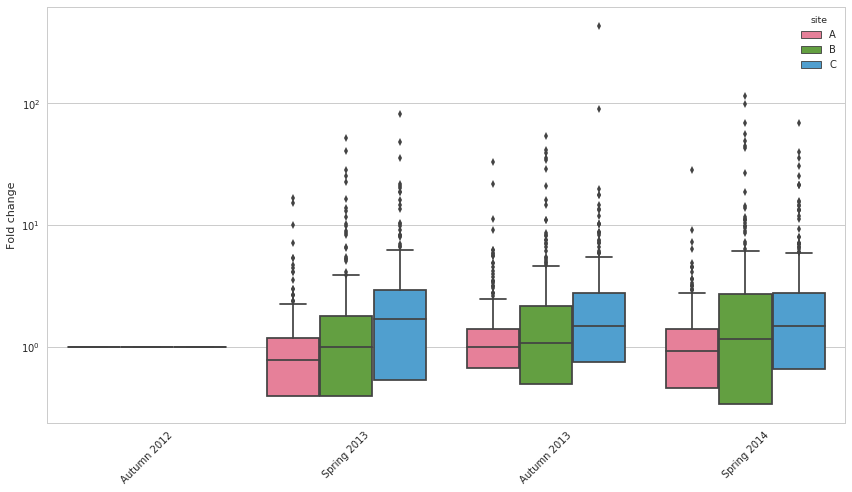

In [80]:
fig = plt.figure(figsize=(12, 7))
sns.set(font_scale=1.8)
sns.set(font_scale=1.5)
sns.set(style='whitegrid')
ax=sns.boxplot(x="variable", y="value", hue="site", data=mconcat[~mmask],palette=sns.husl_palette(3, h=2) )
#sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('')
plt.ylabel('Fold change')
plt.tight_layout()



## by site

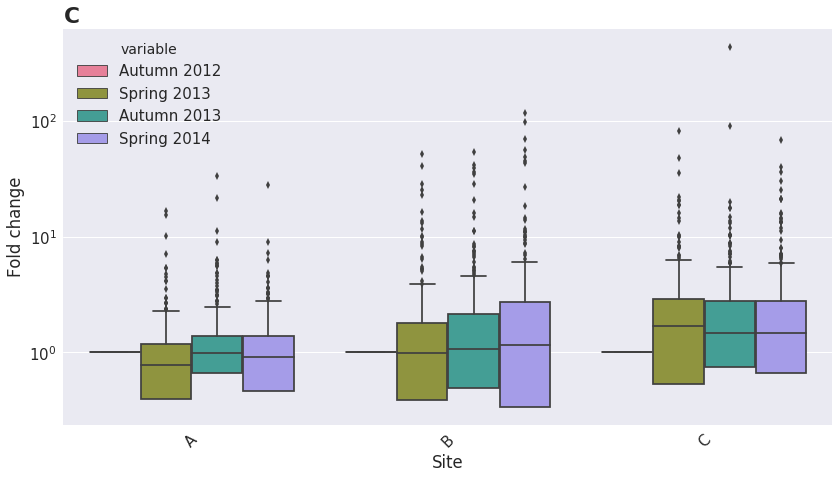

In [84]:
fig = plt.figure(figsize=(12, 7))
sns.set(font_scale=1.5)
sns.boxplot(x="site", y="value", hue="variable", data=mconcat[~mmask],palette=sns.husl_palette(4, h=2))
#sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Site')
plt.ylabel('Fold change')
plt.title("C", loc='left', weight='bold', size='large')
plt.tight_layout()
plt.savefig("../figures/boxplot.foldchange.png", dpi=500)